In [55]:
import os
import pandas as pd
import numpy as np
import glob
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data_folder = 'TPM_dataCSV/'
organs = ["adipose_subcutaneous","adrenal_gland","artery_aorta","artery_coronary","brain_cerebellum","brain_cortex","colon_sigmoid","heart_atrial_appendage","liver","lung","nerve_tibial","pancreas","pituitary","skin_sun_exposed_lower_leg"]

In [57]:
def load_data_for_organ(organ_name):
    csv_file = glob.glob(os.path.join(data_folder, f'gene_tpm_v10_{organ_name}.csv'))[0]
    df = pd.read_csv(csv_file)
    expression_data = df.iloc[:, 3:].transpose()
    expression_data['organ'] = organ_name 
    return expression_data

In [58]:
all_data = pd.DataFrame()
for organ in organs:
    organ_data = load_data_for_organ(organ)
    all_data = pd.concat([all_data, organ_data], axis=0)
print(all_data)

                                 0         1    2         3         4  \
GTEX-111CU-1826-SM-5GZYN  0.000000   3.06160  0.0  0.000000  0.000000   
GTEX-111FC-0226-SM-5N9B8  0.000000   3.95025  0.0  0.042660  0.000000   
GTEX-111VG-2326-SM-5N9BK  0.000000   3.19860  0.0  0.000000  0.000000   
GTEX-111YS-2426-SM-5GZZQ  0.000000   2.98399  0.0  0.000000  0.037800   
GTEX-1122O-2026-SM-9YFMG  0.000000   2.59251  0.0  0.028196  0.000000   
...                            ...       ...  ...       ...       ...   
GTEX-ZYW4-0126-SM-5E44A   0.000000   2.08963  0.0  0.059341  0.000000   
GTEX-ZYY3-0126-SM-5GZY5   0.000000  14.85090  0.0  0.000000  0.045574   
GTEX-ZZ64-1726-SM-5GZYB   0.000000   8.18698  0.0  0.000000  0.000000   
GTEX-ZZPT-0226-SM-5E43X   0.000000   4.00980  0.0  0.048417  0.034396   
GTEX-ZZPU-2526-SM-GOQZ3   0.017791   5.09581  0.0  0.000000  0.000000   

                                 5         6         7         8         9  \
GTEX-111CU-1826-SM-5GZYN  0.000000  0.071885 

In [59]:
phenotype = pd.read_csv('GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt', sep='\t', usecols=['SUBJID'])
all_data['SUBJID'] = all_data.index.str.split('-').str[0] + '-' + all_data.index.str.split('-').str[1]
merged_data = pd.merge(all_data,phenotype, on='SUBJID', how='left')
merged_data.set_index('SUBJID', inplace=True)
merged_data.dropna(inplace=True)
print(merged_data)

                   0         1    2         3         4         5         6  \
SUBJID                                                                        
GTEX-111CU  0.000000   3.06160  0.0  0.000000  0.000000  0.000000  0.071885   
GTEX-111FC  0.000000   3.95025  0.0  0.042660  0.000000  0.000000  0.052253   
GTEX-111VG  0.000000   3.19860  0.0  0.000000  0.000000  0.000000  0.028885   
GTEX-111YS  0.000000   2.98399  0.0  0.000000  0.037800  0.000000  0.000000   
GTEX-1122O  0.000000   2.59251  0.0  0.028196  0.000000  0.087205  0.017268   
...              ...       ...  ...       ...       ...       ...       ...   
GTEX-ZYW4   0.000000   2.08963  0.0  0.059341  0.000000  0.061178  0.000000   
GTEX-ZYY3   0.000000  14.85090  0.0  0.000000  0.045574  0.066137  0.078578   
GTEX-ZZ64   0.000000   8.18698  0.0  0.000000  0.000000  0.000000  0.033000   
GTEX-ZZPT   0.000000   4.00980  0.0  0.048417  0.034396  0.099831  0.088959   
GTEX-ZZPU   0.017791   5.09581  0.0  0.000000  0.000

In [60]:
extreme_agers = pd.read_csv('extreme_agers.csv', header=None, names=['SUBJID'])
filtered_data = merged_data[merged_data.index.isin(extreme_agers['SUBJID'])]
print(filtered_data)

                   0         1    2         3         4         5         6  \
SUBJID                                                                        
GTEX-1122O  0.000000   2.59251  0.0  0.028196  0.000000  0.087205  0.017268   
GTEX-117YX  0.000000   2.33185  0.0  0.000000  0.034799  0.000000  0.060001   
GTEX-11DYG  0.000000   5.33653  0.0  0.000000  0.000000  0.000000  0.025441   
GTEX-11EMC  0.019145   5.80783  0.0  0.076448  0.000000  0.039407  0.023410   
GTEX-11I78  0.000000   4.06815  0.0  0.104848  0.000000  0.000000  0.000000   
...              ...       ...  ...       ...       ...       ...       ...   
GTEX-ZF3C   0.019418   3.86805  0.0  0.000000  0.027542  0.000000  0.000000   
GTEX-ZLWG   0.018630  12.97630  0.0  0.000000  0.000000  0.038346  0.022780   
GTEX-ZP4G   0.000000   1.56196  0.0  0.000000  0.000000  0.000000  0.051472   
GTEX-ZTPG   0.000000   4.18033  0.0  0.052118  0.000000  0.000000  0.000000   
GTEX-ZYFG   0.000000   5.64146  0.0  0.079005  0.000

In [61]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
extreme_agers_tsne_data = tsne.fit_transform(filtered_data.drop(columns=['organ']))
extreme_agers_tsne = pd.DataFrame(data=extreme_agers_tsne_data, columns=['Dim1', 'Dim2'])
extreme_agers_tsne['organ'] = filtered_data['organ'].values
print(extreme_agers_tsne)

           Dim1       Dim2                       organ
0     -9.767187  -5.331996        adipose_subcutaneous
1     -7.499834 -11.019661        adipose_subcutaneous
2     21.755262  -8.601948        adipose_subcutaneous
3     -1.010164 -15.417280        adipose_subcutaneous
4      1.625582 -13.843864        adipose_subcutaneous
...         ...        ...                         ...
1230 -33.551632 -27.466009  skin_sun_exposed_lower_leg
1231 -30.290735 -29.277586  skin_sun_exposed_lower_leg
1232 -30.207956 -31.009056  skin_sun_exposed_lower_leg
1233 -26.022818 -25.363718  skin_sun_exposed_lower_leg
1234 -23.080462 -14.270636  skin_sun_exposed_lower_leg

[1235 rows x 3 columns]


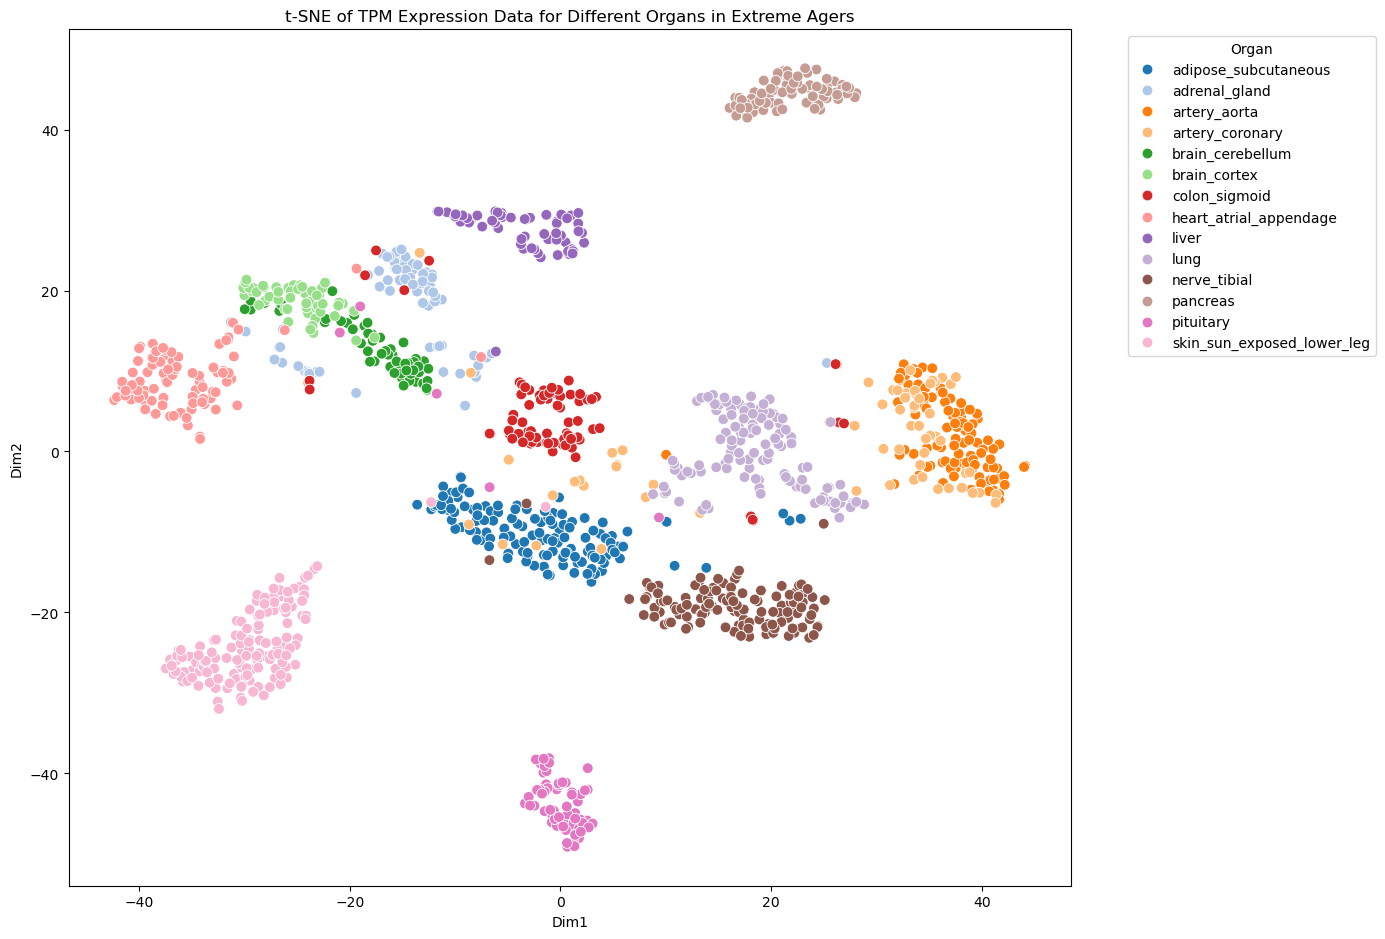

In [62]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Dim1', y='Dim2', hue='organ', palette="tab20", data=extreme_agers_tsne, s=60, alpha=1)
plt.title("t-SNE of TPM Expression Data for Different Organs in Extreme Agers")
plt.legend(title="Organ", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('extreme_agers_tsne.png')
plt.show()
plt.close()